In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

from keras.utils import to_categorical
import os
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# !pip install scikeras[tensorflow]

# from scikeras.wrappers import KerasClassifier
# train_folder = '/content/drive/My Drive/preprocessed-dataset/preprocessed_dataset.csv'

Mounted at /content/drive


In [ ]:
# Function to read data from CSV files
def read_data_from_csv(folder_path):
    dfs = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

In [10]:
# Read data from train and test folders
combined_data = read_data_from_csv('/content/drive/My Drive/datasets/train')


In [11]:
# Encoding categorical variables
encoder = LabelEncoder()
combined_data['label'] = encoder.fit_transform(combined_data['label'])


In [12]:
# Split data into features and labels
X = combined_data.drop(columns=['label'])
y = combined_data['label']

# Split data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X, y, test_size=0.2, random_state=42)


# X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
#     combined_data.drop(columns=['label']),  # Features
#     combined_data['label'],  # Target variable
#     test_size=0.2,  # 20% of data will be used for testing
#     random_state=42,  # For reproducibility
#     stratify=combined_data['label']  # Ensure same label proportions in train and test sets
# )

In [13]:
# Scaling numerical variables
scaler = StandardScaler()
X_train_combined_scaled = scaler.fit_transform(X_train_combined)
X_test_combined_scaled = scaler.transform(X_test_combined)

In [14]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute sample weights based on class imbalance
class_counts = np.bincount(y_train_combined)
total_samples = len(y_train_combined)
class_weights = total_samples / (len(np.unique(y_train_combined)) * class_counts)

# Create AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                         n_estimators=50,
                                         random_state=42)

In [15]:
# Train AdaBoost classifier with sample weights
adaboost_classifier.fit(X_train_combined_scaled, y_train_combined, sample_weight=class_weights[y_train_combined])


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

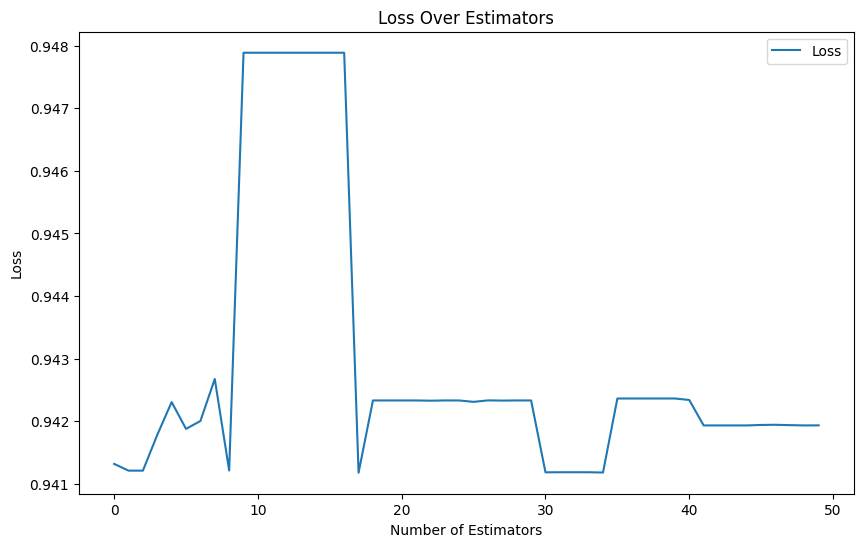

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(adaboost_classifier.estimator_errors_, label="Loss")
plt.xlabel("Number of Estimators")
plt.ylabel("Loss")
plt.title("Loss Over Estimators")
plt.legend()
plt.show()

In [ ]:
# Make predictions
adaboost_predictions = adaboost_classifier.predict(X_test_combined_scaled)


In [ ]:
# Calculate accuracy
adaboost_accuracy = accuracy_score(y_test_combined, adaboost_predictions)

# Print accuracy
print("AdaBoost Accuracy:", adaboost_accuracy)


AdaBoost Accuracy: 0.4062460906783902


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_combined, adaboost_predictions)


In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Print classification report
print("Classification Report for AdaBoost:")
print(classification_report(y_test_combined, adaboost_predictions))